# Credit Card Fraud Detection

In [1]:
import numpy as np
import pandas as pd
import math
from sklearn.decomposition import pca
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv("creditcard.csv")
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [3]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

> Nothing needs imputation

In [4]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


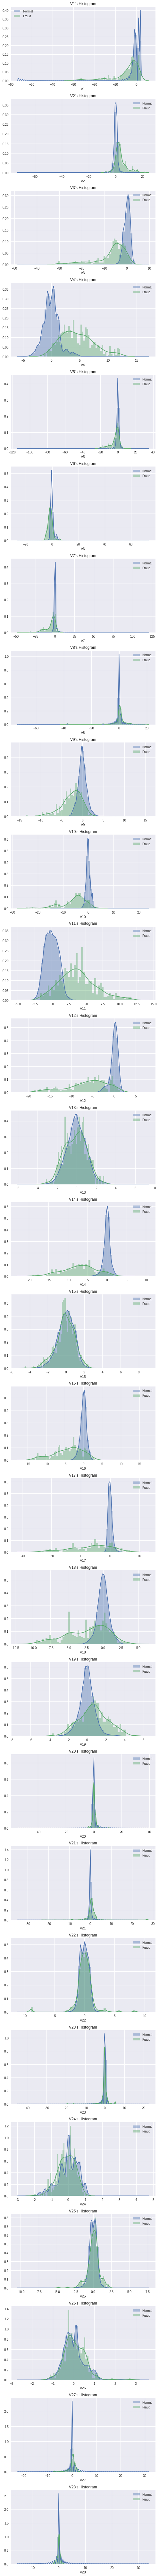

In [5]:
# feature columns: V1, ..., V28
Vcolumns = list(df.columns)[1:29]

# let's look into histograms
plt.figure(figsize = (7, 4*28))
for idx, column in enumerate(Vcolumns):
    plt.subplot(28, 1, idx+1)
    sns.distplot(df[df["Class"] == 0][column], bins = 50, label = "Normal")
    sns.distplot(df[df["Class"] == 1][column], bins = 50, label = "Fraud")
    plt.title(str(column) + "'s Histogram")
    plt.legend()
    
plt.tight_layout()    
plt.show()
    

In [6]:
df = df.drop(['V28','V27','V26','V25','V24','V23','V22','V20','V15','V13','V8'], axis =1)

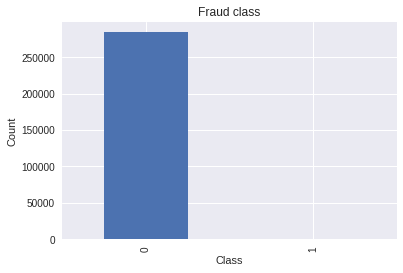

The total counts of each class are  284315 for class 0 and  492  for class 1


In [7]:
count_classes = pd.value_counts(df.Class)
count_classes.plot(kind = 'bar')
plt.title("Fraud class")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()
print("The total counts of each class are ", count_classes[0], "for class 0 and ", count_classes[1]," for class 1")

### Scaling 'Amount' variable

In [8]:
df['scaledAmount'] = (df['Amount'] - df['Amount'].mean()) / df['Amount'].std()
scaled_df = df.copy()
scaled_df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V9,V10,...,V12,V14,V16,V17,V18,V19,V21,Amount,Class,scaledAmount
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,1.914428,4.356170,...,2.711941,4.626942,1.107641,1.991691,0.510632,-0.682920,0.213454,0.77,0,-0.350150
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.584800,-0.975926,...,0.915802,-0.675143,-0.711757,-0.025693,-1.221179,-1.545556,0.214205,24.79,0,-0.254116
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.432454,-0.484782,...,0.063119,-0.510602,0.140716,0.313502,0.395652,-0.577252,0.232045,67.88,0,-0.081839
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.392087,-0.399126,...,-0.962886,0.449624,-0.608577,0.509928,1.113981,2.897849,0.265245,10.00,0,-0.313248
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,0.486180,-0.915427,...,-0.031513,-0.084316,-0.302620,-0.660377,0.167430,-0.256117,0.261057,217.00,0,0.514354


### Dropping 'Time' and 'Amount' which are not needed

In [9]:
preproceesed_df = scaled_df.drop(['Time', 'Amount'], axis = 1)
preproceesed_df.tail()

,V1,V2,V3,V4,V5,V6,V7,V9,V10,V11,V12,V14,V16,V17,V18,V19,V21,Class,scaledAmount
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,1.914428,4.356170,-1.593105,2.711941,4.626942,1.107641,1.991691,0.510632,-0.682920,0.213454,0,-0.350150
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.584800,-0.975926,-0.150189,0.915802,-0.675143,-0.711757,-0.025693,-1.221179,-1.545556,0.214205,0,-0.254116
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.432454,-0.484782,0.411614,0.063119,-0.510602,0.140716,0.313502,0.395652,-0.577252,0.232045,0,-0.081839
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.392087,-0.399126,-1.933849,-0.962886,0.449624,-0.608577,0.509928,1.113981,2.897849,0.265245,0,-0.313248
284806,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,0.486180,-0.915427,-1.040458,-0.031513,-0.084316,-0.302620,-0.660377,0.167430,-0.256117,0.261057,0,0.514354


In [10]:
normal_df = preproceesed_df[preproceesed_df.Class == 0]
anomalous_df = preproceesed_df[preproceesed_df.Class == 1]

In [11]:
normal_X, normal_y = normal_df.drop("Class", axis = 1), normal_df.Class

In [12]:
normal_X_train, normal_X_test, normal_y_train, normal_y_test = train_test_split(normal_X, normal_y, test_size = 0.3, random_state = 0)

In [13]:
gmm = GaussianMixture(n_components=2, covariance_type='full')
gmm.fit(normal_X_train)

anomalous_X, anomalous_y = anomalous_df.drop("Class", axis = 1), anomalous_df.Class
X_test = pd.concat([normal_X_test, anomalous_X])
y_test = pd.concat([normal_y_test, anomalous_y])
y_pred = gmm.predict(X_test)

In [14]:
metrics.confusion_matrix(y_pred = y_pred, y_true = y_test)

array([[64590, 20705],
       [   49,   443]])

In [15]:
metrics.recall_score(y_pred = y_pred, y_true = y_test)

0.90040650406504064

In [16]:
metrics.precision_score(y_pred = y_pred, y_true = y_test)

0.020947607338755437

In [17]:
metrics.f1_score(y_pred = y_pred, y_true = y_test)

0.04094269870609981